<a href="https://colab.research.google.com/github/chandini2595/CMPE255_Assignment3/blob/main/Time_Series_Forecasting_Univariate_Without_Exogenous_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 49.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

In [2]:
import pycaret
pycaret.__version__

'3.3.2'

In [5]:
from pycaret.datasets import get_data
data = get_data('traffic')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,1,5545
1,NaN,289.36,0.0,0.0,75,Clouds,0,4516
2,NaN,289.58,0.0,0.0,90,Clouds,0,4767
3,NaN,290.13,0.0,0.0,90,Clouds,0,5026
4,NaN,291.14,0.0,0.0,75,Clouds,0,4918


<Axes: >

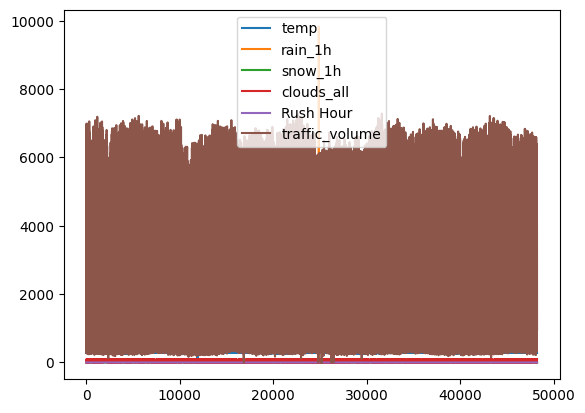

In [6]:
data.plot()

In [24]:
import pandas as pd
from pycaret.datasets import get_data

# Load the dataset
data = get_data('energy')

# Display missing values
print(data.isnull().sum())

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64


In [30]:
from pycaret.time_series import *
s = setup(data,target='Cooling Load',fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Cooling Load
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(768, 10)"
5,Transformed data shape,"(768, 10)"
6,Transformed train set shape,"(765, 10)"
7,Transformed test set shape,"(3, 10)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [31]:
# Create and compare models
best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.1084,0.0766,0.4412,0.5246,0.0223,0.0218,-0.7851,0.4900
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,0.1195,0.0843,0.4862,0.5771,0.0248,0.0244,-1.3132,3.0000
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.1942,0.1317,0.7908,0.9025,0.0421,0.0421,-34.7709,1.1367
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.1984,0.1335,0.8074,0.9139,0.0414,0.0403,-10.3501,0.3633
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2035,0.1391,0.8288,0.9531,0.0443,0.0443,-41.2975,0.5767
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2109,0.1346,0.8594,0.9227,0.0460,0.0464,-55.5583,0.3433
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.2118,0.1385,0.8619,0.9482,0.0448,0.0455,-10.7677,0.2000
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.2209,0.1588,0.8988,1.0870,0.0498,0.0477,-19.5992,0.2267
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.2271,0.1507,0.9249,1.0325,0.0479,0.0477,-35.3767,0.3333
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.2412,0.1554,0.9815,1.0641,0.0508,0.0520,-18.3680,0.1967


Processing:   0%|          | 0/89 [00:00<?, ?it/s]

In [32]:
# Analyze the best model
plot_model(best_model, plot='ts')

In [33]:
# Make future predictions
future_predictions = predict_model(best_model, fh=12)  # Forecast for the next 12 periods
print(future_predictions)

      y_pred
765  16.5310
766  16.4843
767  16.5894
768  21.8261
769  22.1393
770  22.2056
771  22.3148
772  22.2339
773  22.3357
774  22.2474
775  22.3492
776  22.2610


In [34]:
# Save the best model
save_model(best_model, 'best_univariate_electricity_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2,
                                                                                                                                         1]},
                                                                                                                    n_jobs=1)],
                                                                                     regressor=ExtraTreesRegressor(n_jobs=-1, random_state=123),
                                                                                     sp=2,
                                                                                     window_length=2))]))]),
 'best_univariate_electricity_model.pkl')